# Exploratory Notebook

# Business Understanding

## Business Context
Our company is entering the competitive movie production industry by establishing a new movie studio. With major corporations increasingly investing in original video content, we need to strategically position ourselves to maximize our chances of box office success.

## Primary Stakeholder
**Head of New Movie Studio** - The key decision-maker who will use our analysis to guide the studio's content creation strategy and investment decisions.

## Key Business Questions

### 1. **What genres are most profitable?**
   - Which movie genres consistently generate the highest box office returns?
   - Are there emerging genres showing strong growth potential?

### 2. **What budget ranges optimize ROI?**
   - What is the relationship between production budget and box office performance?
   - What budget sweet spot maximizes return on investment?

### 3. **When should we release our films?**
   - Which months/seasons show the strongest box office performance?
   - How can we avoid oversaturated release periods?

## Business Objectives
- **Primary Goal:** Identify the most profitable film characteristics to guide our initial movie productions
- **Success Metrics:** Maximize box office revenue and return on investment
- **Risk Mitigation:** Minimize financial losses by avoiding poorly-performing film categories

## Data Requirements & Analysis Considerations

### Dataset Specifications Needed:
1. **What movie data do we have access to?** (Box office numbers, budgets, genres, release dates, ratings, etc.)
2. **What time period does our data cover?** (Recent years only, or historical data?)
3. **Is it domestic box office, international, or worldwide gross?**

### Business Context Clarifications:
4. **What size studio are we targeting?** (Independent/small budget vs. major studio competitor?)
5. **Are there any genre restrictions?** (Family-friendly only, or open to all ratings?)
6. **Geographic focus?** (Domestic US market, international, or global?)

### Analysis Scope Considerations:
7. **Should we consider streaming/digital revenue or just theatrical box office?**
8. **Do we want to analyze competitor studios' strategies?**
9. **Should seasonal trends consider COVID-19 impact on recent years?**

## Success Metrics Framework
**Primary Metrics:**
- **Gross Revenue:** Total box office performance
- **Return on Investment (ROI):** (Revenue - Budget) / Budget × 100
- **Profit Margins:** Net profit as percentage of revenue
- **Budget Efficiency:** Revenue per dollar invested

**Secondary Metrics:**
- **Market Share:** Performance relative to industry
- **Risk Assessment:** Variance in returns by category
- **Audience Reach:** Ticket sales and demographic penetration

## Recommended Visualizations Strategy

### 1. **Genre Analysis**
- **Horizontal Bar Chart:** Average revenue by genre (easy comparison)
- **Box Plot:** Revenue distribution by genre (shows variability and outliers)
- **Scatter Plot:** Budget vs. Revenue by genre (profitability insights)

### 2. **Budget Optimization**
- **Scatter Plot with Trend Line:** Budget vs. ROI (sweet spot identification)
- **Histogram:** Distribution of profitable budget ranges
- **Bubble Chart:** Budget vs. Revenue (bubble size = profit margin)

### 3. **Release Timing**
- **Line Graph:** Monthly box office performance over time
- **Heatmap:** Revenue by month and genre combination
- **Seasonal Bar Chart:** Quarterly performance comparison

### 4. **Risk vs. Reward Analysis**
- **Risk-Return Scatter Plot:** Average return vs. standard deviation by category
- **Waterfall Chart:** Success rate breakdown by film characteristics

## Expected Deliverables
Three concrete, data-driven recommendations that the Head of Movie Studio can immediately implement in the studio's content strategy and production planning.

# Data Understanding

`bom.movie_gross.csv.gz` dataset from Box Office Mojo contains the revenue data for various films. It contains the following five columns:

- **title**: movie title
- **studio**: producing studio
- **domestic_gross**: domestic gross earnings in USD
- **foreign_gross**: international gross earnings
- **year**: year film was released

`im` database from IMDb (Internet Movie Database) contains information about the movies and those who worked on them. It contains eight tables with the following fields:
- `directors` table contains the directors. It contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: director's ID (as per IMDb)
- `known_for` table contains the notable works for each person. It contains the following two fields:
    - **person_id**: unique person ID (as per IMDb)
    - **movie_id**: unique movie ID (as per IMDb)
- `movie_akas` table contains the alternative titles of the movies. It contains the following eight fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order in which movie title appears
    - **title**: alternative title for the movie
    - **region**: country code where movie was shown
    - **language**: language code of the movie
    - **types**: type of alternative title
    - **attributes**: special attributes of the movie
    - **is_original_title**: shows whether alternative title is the origianl title (1 = original title, 0 = alternative title)
- `movie_basics` table contains basic information about the movies. It contains the following six fields:
    - **movie_id**: unique identifier for the movie (as per IMDb)
    - **primary_title**: official title of the movie
    - **original_title**: official title of the movie in the original language
    - **start_year**: year when the movie was released
    - **runtime_minutes**: duration of the movie in minutes
    - **genres**: genre(s) of the movie
- `movie_ratings` table contains the ratings movies were given by IMDb. It contains the following three fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **averagerating**: average IMDb rating
    - **numvotes**: number of votes received
- `persons` table contains records of those involved in the movies. It has the following five fields:
    - **person_id**: unique identifier for the person (as per IMDb)
    - **primary_name**: full name of the person
    - **birth_year**: year of birth
    - **death_year**: year of death (if dead)
    - **primary_profession**: role in the movie
- `principals` table contains the information of the main cast and crew. It has the following five fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **ordering**: order of person in credits
    - **person_id**: unique person ID (as per IMDb)
    - **category**: role played
    - **job**: specific role
    - **characters**: character name
- `writers` table contains the following two fields:
    - **movie_id**: unique movie ID (as per IMDb)
    - **person_id**: writer's ID (as per IMDb)

`rt.movie_info.tsv.gz` dataset from Rotten Tomatoes contains general information about the movies. It contains the following twelve columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **synopsis**: short summary of the movie
- **rating**: Motion Picture Association of America(MPAA) Rating
- **genre**: genre(s) of the movie
- **director**: name of the director(s)
- **writer**: name of the writer(s)
- **theater_date**: date released in theaters
- **dvd_date**: date released in DVD format
- **currency**: currency symbol
- **box_office**: total revenue from box office
- **runtime**: movie duration in minutes
- **studio**: producing studios

`rt.reviews.tsv.gz` dataset from Rotten Tomatoes contains review information about movies. It contains the following eight columns:
- **id**: unique movie ID (as per Rotten Tomatoes)
- **review**: review text
- **rating**: rating given by critic
- **fresh**: categorization of the review (fresh = positive, rotten = negative)
- **critic**: name of the critic
- **top_critic**: highlights if a critic is regarded as a Top Critic by Rotten Tomatoes (1 = top critic, 0 = not a top critic)
- **publisher**: publication name
- **date**: date of the review

`tmdb.movies.csv.gz` from The Movie Database (TMDb) contains movie and rating informations about various movies. It contains the following nine columns:
- **genre_ids**: list of genre(s) for the movie
- **id**: unique movie ID (as per TMDb)
- **original_language**: language code for the movie
- **original_title**: title of the movie in the official language
- **popularity**: popularity score (as per TMDb)
- **relaease_date**: release date in theatres
- **title**: movie title
- **vote_average**: average user rating
- **vote_count**: total votes received

`tn.movie_budgets.csv.gz` from The Numbers dataset contains movie budget and revenue information. It has the following six columns:
- **id**: unique movie ID (as per The Numbers)
- **release_date**: release date in theatres
- **movie**: movie title
- **production_budget**: budget used (in USD)
- **domestic_gross**: revenue generated from country of origin (in USD)
- **worldwide_gross**: total revenue generated worldwide (in USD)


In [17]:
#importing relevant libs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import sqlite3


## Loading the Data sets

In [18]:
#going through SQl
def load_tables(connection):
    table_names = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", connection
    )["name"].tolist()
    sql_tables = {
        table_name: pd.read_sql(f"SELECT * FROM {table_name}", connection)
        for table_name in table_names
    }
    return sql_tables

path = '../Data/im.db'
conn = sqlite3.connect(path)

imdb_tables = load_tables(conn)

print(imdb_tables.keys())


dict_keys(['movie_basics', 'directors', 'known_for', 'movie_akas', 'movie_ratings', 'persons', 'principals', 'writers'])


In [19]:
bom_movie = pd.read_csv("../Data/bom.movie_gross.csv")
rt_info = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
rt_reviews = pd.read_csv("../Data/rt.movie_info.tsv", sep='\t', encoding='latin1')
tmdb_df = pd.read_csv("../Data/tmdb.movies.csv")
tn_budget = pd.read_csv("../Data/tn.movie_budgets.csv")

## SQL CLEANING AND MERGING

In [20]:
movie_basics = imdb_tables['movie_basics']
movie_basics.shape
movie_basics.head()
movie_basics.info()
movie_basics.describe()
print(movie_basics.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64


In [21]:
movie_basics_cp = movie_basics.copy(deep=True)

movie_basics_cp['original_title'] = movie_basics_cp['original_title'].fillna('Unknown')

movie_basics_median = movie_basics_cp['runtime_minutes'].median()

movie_basics_cp['runtime_minutes'] = movie_basics_cp['runtime_minutes'].fillna(movie_basics_median)

movie_basics_cp['genres'] = movie_basics_cp['genres'].fillna("Unknown")

In [22]:
print(movie_basics_cp.isna().sum())
movie_basics_cp.shape

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


(146144, 6)

In [23]:
movie_basics_cp['start_year'].unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027], dtype=int64)

<AxesSubplot:xlabel='start_year'>

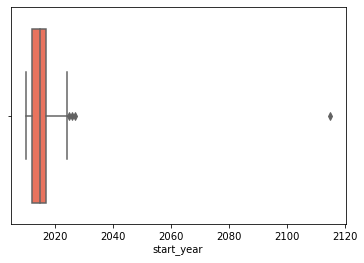

In [24]:
sns.boxplot(x= movie_basics_cp['start_year'], color='tomato')

In [25]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['start_year'] < 2025]
movie_basics_cp.shape



(146140, 6)

<AxesSubplot:xlabel='runtime_minutes'>

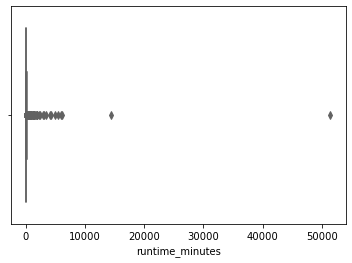

In [26]:
sns.boxplot(x= movie_basics_cp['runtime_minutes'], color='tomato')

In [27]:
runtime = movie_basics_cp['runtime_minutes'].sort_values(ascending=True)
runtime


95787         1.0
113278        1.0
93214         1.0
72190         1.0
98755         1.0
           ...   
88717      5460.0
87264      6000.0
123467     6017.0
44840     14400.0
132389    51420.0
Name: runtime_minutes, Length: 146140, dtype: float64

In [28]:
movie_basics_cp = movie_basics_cp[movie_basics_cp['runtime_minutes'].between(40, 150)]
movie_basics_cp.duplicated().sum()

0

In [29]:
movie_ratings = imdb_tables['movie_ratings']
movie_ratings.shape
movie_ratings.head()
movie_ratings.describe()
movie_ratings.info()
movie_ratings.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [30]:
movie_ratings_cp = movie_ratings.copy(deep=True)

In [31]:
movie_merge = movie_basics_cp.merge(movie_ratings_cp, on='movie_id', how='inner')
movie_merge

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.1,32
...,...,...,...,...,...,...,...,...
72222,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
72223,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
72224,tt9914642,Albatross,Albatross,2017,87.0,Documentary,8.5,8
72225,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,87.0,Unknown,6.6,5


In [54]:
persons_cp= imdb_tables["persons"].copy(deep=True)
persons_cp

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [59]:
persons_cp.shape
persons_cp.head()
persons_cp.info()
persons_cp.describe()
print(persons_cp.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB
person_id                  0
primary_name               0
birth_year            523912
death_year            599865
primary_profession     51340
dtype: int64


In [62]:
persons_cp['birth_year'].fillna(persons_cp['birth_year'].median(), inplace=True)
print(persons_cp.isna().sum())

person_id                  0
primary_name               0
birth_year                 0
death_year            599865
primary_profession     51340
dtype: int64


In [64]:
persons_cp['death_year'].fillna(persons_cp['death_year'].median(), inplace=True)
print(persons_cp.isna().sum())

person_id                 0
primary_name              0
birth_year                0
death_year                0
primary_profession    51340
dtype: int64


In [65]:
persons_cp['primary_profession'].fillna('unknown',inplace = True)
persons_cp.isnull().sum()

person_id             0
primary_name          0
birth_year            0
death_year            0
primary_profession    0
dtype: int64